---
title: "Investment and Portfolio Management Tutorial Class 2"
subtitle: "Imperial College London - Business School"
author: 
  - name: "Rodolphe Lajugie"
date: "2025-10-28"
format: pdf
fontsize: 12pt
geometry: margin=1in
titlepage: true
titlepage-geometry: "top=2cm, bottom=2cm, left=2cm, right=2cm"
---
\newpage
\tableofcontents
\listoffigures
\listoftables
\newpage

In [1]:
# | message: false
# | warning: false

In [2]:
import pandas as pd
import numpy as np
import IPM_modules as ipm
import matplotlib.pyplot as plt

In [3]:
data = {
    'Stock X': {'forecast_return': 0.14, 'std_dev': 0.23, 'beta': 0.6},
    'Stock Y': {'forecast_return': 0.16, 'std_dev': 0.14, 'beta': 1.3},
    'Market index': {'forecast_return': 0.18, 'std_dev': 0.13, 'beta': 1.0},
    'Risk-free rate': {'forecast_return': 0.07, 'std_dev': 0.0, 'beta': 0.0}
}

print("Alpha values for the assets:")
to_do = ["Stock X", "Stock Y"]

for asset, metrics in data.items():
    if asset in to_do:
        alpha = ipm.calculate_alpha(
            expected_return=metrics['forecast_return'],
            rf=data['Risk-free rate']['forecast_return'],
            beta=metrics['beta'],
            rm=data['Market index']['forecast_return']
        )
        data[asset]['Expected return'] = ipm.calculate_excess_return(
            data['Risk-free rate']['forecast_return'], metrics['beta'], 
            data['Market index']['forecast_return'])
        print(f"{asset}: {alpha*100:.4f}")

Alpha values for the assets:
Stock X: 0.4000
Stock Y: -5.3000


In [4]:
# | label: Stock_and_market_table
# | tbl-cap: "Table containing the expected returns and standard deviations of Stock X, Stock Y, the Market Index, and the Risk-Free Rate."

df = pd.DataFrame(data).T
df.loc['Market index', 'Expected return'] = data['Market index']['forecast_return']
df

,forecast_return,std_dev,beta,Expected return
Stock X,0.14,0.23,0.6,0.136
Stock Y,0.16,0.14,1.3,0.213
Market index,0.18,0.13,1.0,0.180
Risk-free rate,0.07,0.00,0.0,NaN


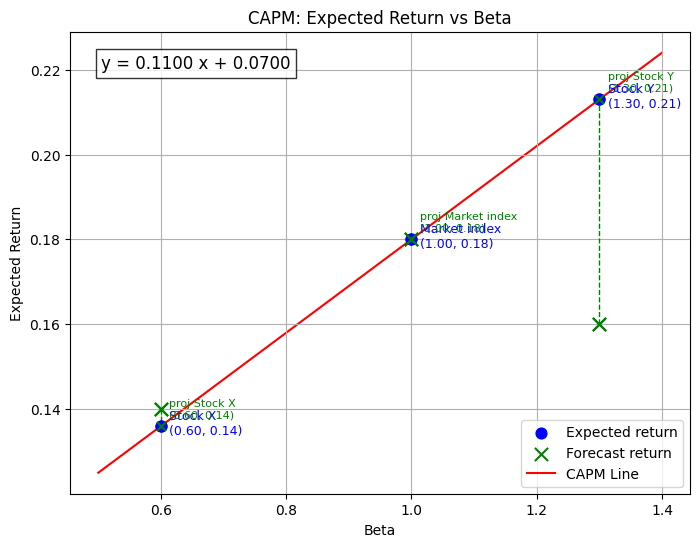

In [5]:
# | label: CAPM_plot
# | fig-cap: "CAPM: Expected Return vs Beta with projections for forecast returns."

df_tmp = df[df.index.isin(['Stock X', 'Stock Y', 'Market index'])]
ipm.print_sml(df_tmp)


# Problem 1
### 1. Identify and justify which stock would be more appropriate for an investor who wants to add his stock to a well diversified portfolio

**Stock X**  is the better choice to add to a well diversified portfolio because it has a positive alpha. Additional considerations are:
- A low Beta has a good impact on overall portfolio risk
- The high individual risk can be offset by diversification

### 2. Identify and justify which stock would be more appropriate for an investor who wants to hold this stock as a single stock portfolio

If the investor wants to hold the stock as a single stock portfolio, beta as a risk measure is irrelevant. Instead, when a stock is held as a single stock portfolio, standard deviation (or variance) is the appropriate risk measure to consider. Therefore, **Stock Y** is the better choice because it has a lower standard deviation (14% vs 23%).

# APT Problem 1

Assume that stock market returns have the market index as a common factor, and that all stocks in the economy have a beta of 1 on the market index. Firm-specific returns all have a standard deviation of 30%.<br>
Suppose that an analyst studies 20 stocks and finds that one-half of them have an alpha of +2%, and the other half have an alpha of -2%. Suppose the analyst invests $1 million in an equally weighted portfolio of the positive alpha stocks and shorts $1 million of an equally weighted portfolio of the negative alpha stocks

### 1. **What is the expected profit (in dollars) and standard deviation of the analyst’s profit?**

$E[R_i] = \alpha_i + \beta_{iM} R_m$

As we know that all stocks have a beta of 1, the expected return for each stock can be written as: $E[R_i] = \alpha_i + R_M$
We know that for the portfolio with a positive and negative alpha stocks respectively:<br>
- $E[R_+]=0.02+R_M$
- $E[R_-]=-0.02+R_M$

**Investing 1M in positive alpha stocks (10 stocks) and shorting 1M in negative alpha stocks (10 stocks):**

Doing so eliminates the market risk exposure. Expected return becomes:<br>
$E(R_P) = 1000000[E(R_+)] - 1000000[E(R_-)] = 1000000[(0.02+R_M) - (-0.02+R_M)] = 1000000 * 0.04 = £40000$

Expected return is £40000. The long portfolio has market risk exposure, therefore systematic market risk cancels out, however, firm-specific risks remain.<br>
*Note that firm-specific standard deviation of returns is 0.3*

-> Standard deviation of the portfolio:<br>
$(100,000)^2V(R)=(100,000)^2(0.3)^2=900,000,000$ 

Knowing we have invested 20 times 100,000 in each stock, we multiply by 20:<br>
$V(R_P) = 20 * 900,000,000 = 18,000,000,000$<br>
$\sigma_{R_P} = \sqrt{18,000,000,000} = £134164.08$

### 2. How does the answer change if the analyst examines 50 stocks instead of 20 stocks? 100 stocks?

In [6]:
invest_init = 2000000

investments = [10, 20, 50, 100, 500]
for invest in investments:
    var_per_asset = ipm.calculate_variance_per_asset(invest_init/invest, 0.3)
    total_variance = var_per_asset * invest
    print(f"Total variance for investment of ${invest}: {total_variance:,.2f}")
    print(f"Total standard deviation for investment of ${invest}: {total_variance**0.5:,.2f}\n")

Total variance for investment of $10: 36,000,000,000.00
Total standard deviation for investment of $10: 189,736.66

Total variance for investment of $20: 18,000,000,000.00
Total standard deviation for investment of $20: 134,164.08

Total variance for investment of $50: 7,200,000,000.00
Total standard deviation for investment of $50: 84,852.81

Total variance for investment of $100: 3,600,000,000.00
Total standard deviation for investment of $100: 60,000.00

Total variance for investment of $500: 720,000,000.00
Total standard deviation for investment of $500: 26,832.82



# ATP Problem 2

Assume that security returns are generated by the single index model, where $R_i$ is the excess return for security $i$ and $R_M$ is the market’s excess return. The risk-free rate is 2%. Suppose also that there are three securities, $A$, $B$, and $C$:

In [7]:
# | label: data_APT_2
# | tbl-cap: "Securities information for APT Problem 2."
data = {
    'Actif': ['A', 'B', 'C'],
    'beta': [0.8, 1.0, 1.2],
    'Expected return': [0.10, 0.12, 0.14],
    'std': [0.25, 0.10, 0.20]
}
df = pd.DataFrame(data)
df.set_index('Actif', inplace=True)
df

,beta,Expected return,std
Actif,,,
A,0.8,0.10,0.25
B,1.0,0.12,0.10
C,1.2,0.14,0.20


### 1. If $\sigma_M = 20%$, calculate the variance of returns for each security.

In [8]:
sigma_M = 0.20
for actif in df.index:
    beta = df.loc[actif, 'beta']
    ei = df.loc[actif, 'std']#*100
    var = ipm.calculate_formule_variance(df.loc[actif, 'Expected return'], 
                                         beta, sigma_M, ei)
    print(f"Variance of returns for {actif}: {var*10000:,.2f}")


Variance of returns for A: 881.00
Variance of returns for B: 500.00
Variance of returns for C: 976.00


Now assume that there are an infinite number of assets with return characteristics identical to those of A, B, and C, respectively. If one forms a well-diversified portfolio of type A securities, 
### 2. What will be the mean and variance of the portfolio’s excess returns? What about portfolios composed only of type B or type C stocks?

If there are an infinite number of assets with identical characteristics, then a well-diversified **portfolio** of each type will have only systematic risk since the non-systematic risk approaches zero as the number of assets n becomes very large.

Every portfolio's variance is therefore:
$V(R_i)=(\beta_i)^2 * \sigma_M^2 + \sigma_{ei}^2/n \approx (\beta_i)^2 * \sigma_M^2$ with n approaching infinity, $\sigma_{ei}^2/n$ approaches 0. <br>
This gives us:

In [9]:
sigma_M = 0.20
for actif in df.index:
    beta = df.loc[actif, 'beta']
    var = (beta ** 2) * sigma_M**2  # because non-systematic risk approaches 0
    print(f"Variance of returns for {actif}: {var*10000:,.2f}")

Variance of returns for A: 256.00
Variance of returns for B: 400.00
Variance of returns for C: 576.00


### 3. Is there an arbitrage opportunity in this market? What is it? <br>
Analyze the opportunity graphically.

As we did before, we can plot the Security Market Line (SML) using the Capital Asset Pricing Model (CAPM) equation:<br>

$SML: E(R_i) = r_f + \beta_i [E(R_M) - r_f]$<br>
To check wether there is an arbitrage opportunity, we can compute the expected market risk premium: <br>
- $R_1: E(R_M) - r_f = \frac{E(r_i) - r_f}{\beta_i} = \frac{(0.1 - 0.02)}{0.8} = 0.10$ or 10% <br>
- $R_2: E(R_M) - r_f = \frac{E(r_i) - r_f}{\beta_i} = \frac{(0.12 - 0.02)}{1} = 0.10$ or 10% <br>
- $R_3: E(R_M) - r_f = \frac{E(r_i) - r_f}{\beta_i} = \frac{(0.14 - 0.02)}{1.2} = 0.10$ or 10% <br>


$\Rightarrow E(r_M) - r_f = 10%$<br>
Therefore, for each asset $E(R_i) = r_f + \beta_i * 10%$ which means there is no arbitrage opportunity in this market as all assets are correctly priced according to the CAPM.

lets try then to plot the SML and see if confirms our calculations.

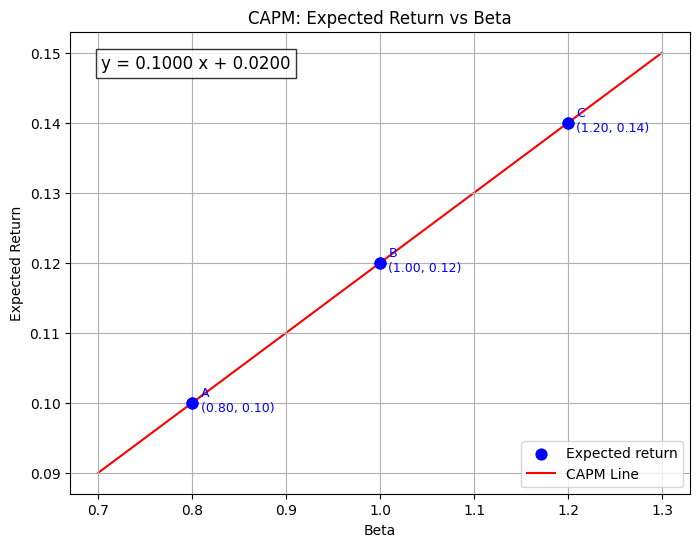

In [10]:
# | label: SML_APT_PB2
# | fig-cap: "SML of APT Pb2 to check if there is arbitrage opportunity."

ipm.print_sml(df)

We clearly see that all the three assets lie on the SML which means there is no arbitrage opportunity in this market.

### 3. How to construct an arbitrage portfolio if expected returns rises more than proportionately with beta

The SML relationship states that the expected risk premium on a security in a one-factor model must be directly proportional to the security’s beta. Suppose that this were not the case. For example, suppose that expected return rises more than proportionately with beta as in the figure following figure:

![Screenshot 2025-10-28 at 17.41.11.png](<attachment:Screenshot 2025-10-28 at 17.41.11.png>)
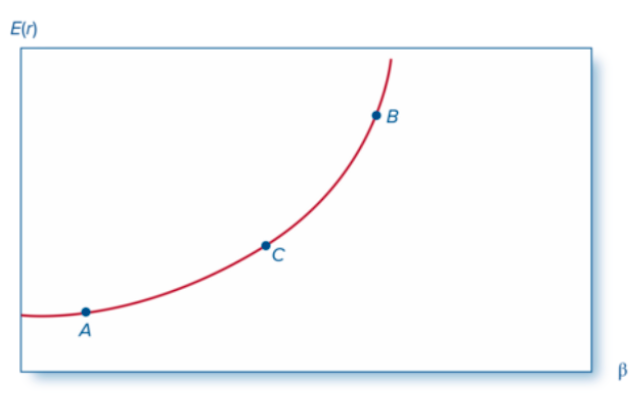

Suppose we have a portfolio P such that it contains portfolio A weighted by $\omega_A$ and portfolio B weighted by $\omega_B$<br> 

The expected return of portfolio P is given by:<br>
$E(R_P) = \omega_A E(R_A) + \omega_B E(R_B)$<br>

The beta of portfolio P is given by:<br>
$\beta_P = \omega_A \beta_A + \omega_B \beta_B$<br>

**Hypothesis**
- Suppose we choose weights such that $\beta_P=\beta_C$
- Since the curve is convex, $E(R_P) > E(R_C)$
- $\Rightarrow$ Arbitrage opportunity: Go long portfolio P (combination of A and B) and short portfolio C in equal amounts.

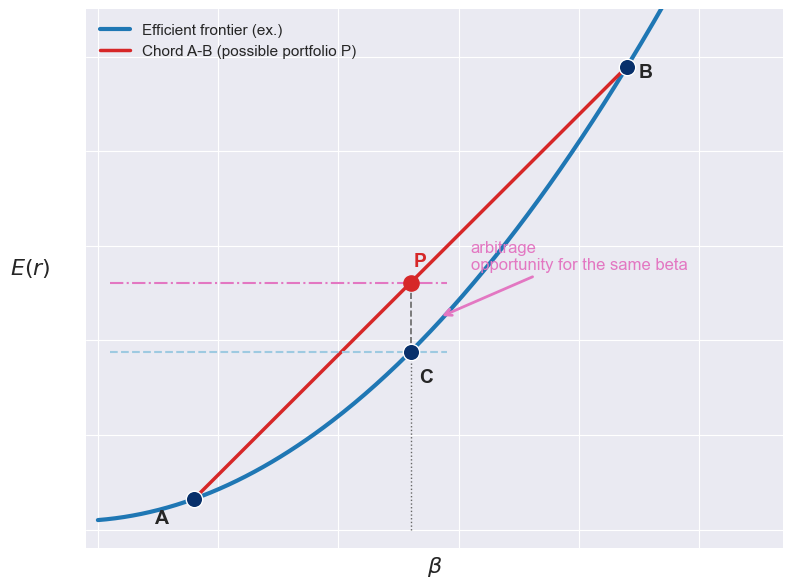

In [11]:
# | label: illustration_arbitrage_opportunity
# | fig-cap: "Typical illustration of an arbitrage opportunity when the chord between two points on a convex efficient frontier lies above the frontier itself."

def plot_arbitrage_illustration(save_path=None, show=True):
    # curve (convex, emphasised)
    beta = np.linspace(0.0, 2.7, 300)
    a, b, c = 0.09, 0.02, 0.01  # strengthen convexity
    E_curve = a * beta**2 + b * beta + c

    # chosen points on the curve: A, C, B
    beta_A, beta_C, beta_B = 0.4, 1.3, 2.2
    E_A = a * beta_A**2 + b * beta_A + c
    E_C = a * beta_C**2 + b * beta_C + c
    E_B = a * beta_B**2 + b * beta_B + c

    # construct portfolio P as a convex combination of A and B with beta_P = beta_C
    # find weight w for portfolio P = w*A + (1-w)*B such that beta_P = beta_C
    w = (beta_C - beta_B) / (beta_A - beta_B)
    E_P = w * E_A + (1 - w) * E_B
    beta_P = beta_C  # by construction

    # ensure P lies above curve (illustration of convexity) -> nudge E_P upward slightly
    # E_P += 0.03  # accentuate arbitrage gap

    # plotting
    plt.style.use("seaborn-v0_8-darkgrid")
    fig, ax = plt.subplots(figsize=(9, 7))

    # curve
    ax.plot(beta, E_curve, color="#1f77b4", linewidth=3, 
            label="Efficient frontier (ex.)")

    # AB chord (portfolio line)
    ax.plot([beta_A, beta_B], [E_A, E_B], color="#d62728", 
            linewidth=2.5, label="Chord A-B (possible portfolio P)")

    # points A, B, C, P
    ax.scatter([beta_A], [E_A], color="#08306b", s=140, 
                zorder=6, edgecolors="white")
    ax.scatter([beta_B], [E_B], color="#08306b", s=140, 
                zorder=6, edgecolors="white")
    ax.scatter([beta_C], [E_C], color="#08306b", s=140, 
                zorder=6, edgecolors="white")
    ax.scatter([beta_P], [E_P], color="#d62728", s=120, 
                zorder=7)

    # annotations
    ax.annotate("A", (beta_A, E_A), xytext=(-28, -18), 
                textcoords="offset points", fontsize=14, fontweight="bold")
    ax.annotate("B", (beta_B, E_B), xytext=(8, -8), 
                textcoords="offset points", fontsize=14, fontweight="bold")
    ax.annotate("C", (beta_C, E_C), xytext=(6, -22), 
                textcoords="offset points", fontsize=14, fontweight="bold")
    ax.annotate("P", (beta_P, E_P), xytext=(2, 12), 
                textcoords="offset points", fontsize=14, fontweight="bold", 
                color="#d62728")

    # vertical dashed line at beta_C from P down to curve and further to x-axis
    E_curve_at_C = a * beta_C**2 + b * beta_C + c
    ax.vlines(beta_C, E_curve_at_C, E_P, colors="0.4", linestyles="--", linewidth=1.2)
    ax.vlines(beta_C, 0, E_curve_at_C, colors="0.4", linestyles=":", linewidth=1)

    # dashed horizontal lines showing arbitrage gap and reference
    ax.hlines([E_curve_at_C, E_P], xmin=0.05, xmax=beta_P + 0.15,
              colors=["#9ecae1", "#e377c2"], linestyles=["--", "-."], linewidth=1.5)
    # arrow + label for arbitrage opportunity
    ax.annotate("arbitrage\nopportunity for the same beta",
                xy=(beta_P + 0.12, (E_P + E_curve_at_C) / 2),
                xytext=(beta_P + 0.25, (E_P + E_curve_at_C) / 2 + 0.05),
                fontsize=12, color="#e377c2",
                arrowprops=dict(arrowstyle="->", color="#e377c2", lw=2))

    # aesthetics: axes arrows, labels, limits, hide ticks numbers for sketchy look
    ax.set_xlim(-0.05, 2.85)
    ax.set_ylim(-0.02, 0.55)
    ax.set_xlabel(r'$\beta$', fontsize=16)
    ax.set_ylabel(r'$E(r)$', fontsize=16, rotation=0, labelpad=40)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

    # add small legend and title
    ax.legend(loc="upper left", fontsize=11)

    plt.show()

if __name__ == "__main__":
    plot_arbitrage_illustration()

Some researchers have examined the relationship between average returns on diversified portfolios and the $\beta$ and $\beta^2$ of those portfolios. 

### 5.What should they have discovered about the effect of $\beta^2$ on portfolio return?

Researchers test whether the expected return depends nonlinearly on $\beta$ by estimating:<br>
$E(R_i) = \gamma_0 + \gamma_1 \beta_i + \gamma_2 \beta_i^2$<br>

**Under CAPM/APT theory**: $E(R_i) = \beta_iE(R_m)$
$\Rightarrow$ This is a linear relation between $E(R_i)$ and $\beta_i$. <br>
Interpretation:
- A non zero $\gamma_2$ would mean that expected returns rise more or less than proportionally with $\beta$
- This curvature implies that some portfolios are would lie above and others below the straight-line SML
- Investors could then form a combination of portfolios on either side of the SML to create an **arbitrage portfolio**

**Conclusion**
Because any curvature would allow arbitrage, the theoretical SML must be perfectly linear. Therefore $\gamma_2 = 0$